# Assignment 1
### Our dataset contains a list of data-related job posts crawled from a job hosting site in 2020.

## Import libiraries and read data

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib 
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from scipy.stats import ttest_1samp,ttest_ind
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data1.csv')
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
16156,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
16157,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
16158,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


In [ ]:
#describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          16160 non-null  object 
 1   Salary Estimate    16160 non-null  object 
 2   Job Description    16160 non-null  object 
 3   Rating             16160 non-null  float64
 4   Company Name       16158 non-null  object 
 5   Location           16160 non-null  object 
 6   Headquarters       16160 non-null  object 
 7   Size               16160 non-null  object 
 8   Founded            16160 non-null  int64  
 9   Type of ownership  16160 non-null  object 
 10  Industry           16160 non-null  object 
 11  Sector             16160 non-null  object 
 12  Revenue            16160 non-null  object 
 13  Competitors        16160 non-null  object 
 14  Easy Apply         16160 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.8+ MB


In [ ]:
#describe data
data.describe()

,Rating,Founded
count,16160.000000,16160.000000
mean,3.295056,1456.283911
std,1.550252,871.461505
min,-1.000000,-1.000000
25%,3.200000,-1.000000
50%,3.700000,1980.000000
75%,4.100000,2002.000000
max,5.000000,2020.000000


In [ ]:
#chech duplicates
data.duplicated().sum()

23

In [ ]:
#check nulls
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         2
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

## Question 1 
### Propose two questions (non-predictive) that you believe are interesting to explore and can be answered using the provided dataset (at least one question should be answered using hypothesis test).
### Briefly describe why you think those questions are interesting to whom.

### I think the salary differences in private companies and public companies are too important to the applicats who search for job. And rate too I think he need to compare between them to know which one he wants to choose.

### Q1) Are the salary of data scintest and data analyst larger in private company than public or not?

In [ ]:
#display values of salary estimate
data['Salary Estimate'].unique()

array(['$111K-$181K (Glassdoor est.)', '$120K-$140K (Glassdoor est.)',
       '$119K-$147K (Glassdoor est.)', '$74K-$124K (Glassdoor est.)',
       '$102K-$121K (Glassdoor est.)', '$129K-$210K (Glassdoor est.)',
       '$156K-$254K (Glassdoor est.)', '$116K-$152K (Glassdoor est.)',
       '$133K-$171K (Glassdoor est.)', '$110K-$139K (Glassdoor est.)',
       '$82K-$141K (Glassdoor est.)', '$96K-$119K (Glassdoor est.)',
       '$146K-$175K (Glassdoor est.)', '$102K-$164K (Glassdoor est.)',
       '$113K-$180K (Glassdoor est.)', '$76K-$122K (Glassdoor est.)',
       '$134K-$218K (Glassdoor est.)', '$76K-$125K (Glassdoor est.)',
       '$132K-$208K (Glassdoor est.)', '$83K-$105K (Glassdoor est.)',
       '$75K-$143K (Glassdoor est.)', '$34K-$72K (Glassdoor est.)',
       '$37K-$75K (Glassdoor est.)', '$113K-$184K (Glassdoor est.)',
       '$136K-$164K (Glassdoor est.)', '$34-$53 Per Hour(Glassdoor est.)',
       '$46K-$80K (Glassdoor est.)', '$79K-$130K (Glassdoor est.)',
       '$91K-$10

In [ ]:
#split salary to min and max
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [ ]:
# drop useless values
data.drop(data.index[data['Max_Salary'] == '$75Per Hour'], inplace=True)
data.drop(data.index[data['Max_Salary'] == '$27 Per Hour'], inplace=True)
data.drop(data.index[data['Max_Salary'] == '$26 Per Hour'], inplace=True)
data.drop(data.index[data['Max_Salary'] == '$53 Per Hour'], inplace=True)
data.drop(data.index[data['Max_Salary'] == '1'], inplace=True)

In [ ]:
#remove k & $ from salary values
data['Min_Salary'],_=data['Min_Salary'].str.split('K').str
data['Max_Salary'],_=data['Max_Salary'].str.split('K').str
_,data['Min_Salary']=data['Min_Salary'].str.split('$').str
_,data['Max_Salary']=data['Max_Salary'].str.split('$').str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [ ]:
#convert to numeric
data['Max_Salary']=pd.to_numeric(data['Max_Salary'])
data['Min_Salary']=pd.to_numeric(data['Min_Salary'])
# compute average
data['salary_avg']=(data['Max_Salary']+data['Min_Salary'])*0.5

In [ ]:
#display new columns
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary,salary_avg
0,Senior Data Scientist,$111K-$181K,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,111,181,146.0
1,"Data Scientist, Product Analytics",$111K-$181K,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,111,181,146.0
2,Data Science Manager,$111K-$181K,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,111,181,146.0
3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,111,181,146.0
4,"Director, Data Science",$111K-$181K,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,111,181,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,Cloud Engineer,$76K-$128K,The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1,76,128,102.0
16156,Electrical Engineer,$76K-$128K,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1,76,128,102.0
16157,Sr. Big Data Engineer,$76K-$128K,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,76,128,102.0
16158,Senior Big Data / ETL Engineer,$76K-$128K,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1,76,128,102.0


In [ ]:
#display values of companies types 
data['Type of ownership'].unique()

array(['Company - Private', 'Unknown', 'Company - Public',
       'Nonprofit Organization', '-1', 'Government', 'Hospital',
       'Self-employed', 'Subsidiary or Business Segment', 'Contract',
       'School / School District', 'Private Practice / Firm',
       'College / University', 'Franchise', 'Other Organization'],
      dtype=object)

In [ ]:
#replace -1 with nan
data['Type of ownership']= data['Type of ownership'].replace('Unknown',np.nan)
data['Type of ownership']= data['Type of ownership'].replace('-1',np.nan)
data['Type of ownership']= data['Type of ownership'].replace('Other Organization',np.nan)

In [ ]:
#check the ratio of missing data in type of ownership
total_miss=data['Type of ownership'].isnull().sum()
percent_miss = (total_miss/data['Type of ownership'].isnull().count()*100) 
missing_data = {'Total missing':total_miss,'% missing':percent_miss}
missing_data

{'% missing': 6.965174129353234, 'Total missing': 1120}

In [ ]:
#drop nulls
data=data.dropna()

In [ ]:
#check if the -1 is removed or not
data['Type of ownership'].unique()

array(['Company - Private', 'Company - Public', 'Nonprofit Organization',
       'Government', 'Hospital', 'Self-employed',
       'Subsidiary or Business Segment', 'Contract',
       'School / School District', 'Private Practice / Firm',
       'College / University', 'Franchise'], dtype=object)

In [ ]:
#check titles
data['Job Title'].value_counts()

Data Analyst                                           1265
Data Engineer                                           666
Business Analyst                                        472
Data Scientist                                          243
Senior Data Analyst                                     219
                                                       ... 
Development Associate/Analyst                             1
Accounting Analyst I                                      1
Security Operations Center Analyst                        1
Business Systems Analyst - Telecommute                    1
Future Opportunities: Software Development Engineer       1
Name: Job Title, Length: 6815, dtype: int64

In [ ]:
#extract rows that contain data analyst and data scientist titles only to check the salary
Analyst = data[data['Job Title']=='Data Analyst']
Scientist = data[data['Job Title']=='Data Scientist']
df = pd.concat([Analyst, Scientist], axis=0)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary,salary_avg
3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,111,181,146.0
50,Data Analyst,$120K-$140K,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,120,140,130.0
93,Data Analyst,$74K-$124K,NYU Grossman School of Medicine is one of the ...,4.1,NYU Langone Health\n4.1,"New York, NY","New York, NY",10000+ employees,1841,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",-1,74,124,99.0
108,Data Analyst,$102K-$121K,The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1,102,121,111.5
146,Data Analyst,$129K-$210K,"Whip Media Group's products, including Mediamo...",5.0,Whip Media Group\n5.0,"New York, NY","Santa Monica, CA",51 to 200 employees,2016,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,129,210,169.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,Data Scientist,$62K-$92K,DescriptionWe are looking for data scientist t...,3.5,Robert Half\n3.5,"Houston, TX","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,62,92,77.0
14542,Data Scientist,$87K-$104K,MULTIPLE POSITIONS AVAILABLE\nCompany: Amazon....,3.9,Amazon\n3.9,"Tempe, AZ","Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD),"Google, Microsoft, Walmart",-1,87,104,95.5
14715,Data Scientist,$57K-$108K,Business Unit: The Device Software Product Man...,3.6,Comcast\n3.6,"Philadelphia, PA","Philadelphia, PA",10000+ employees,1963,Company - Public,-1,-1,$10+ billion (USD),"AT&T, Verizon",-1,57,108,82.5
14744,Data Scientist,$54K-$104K,The Device Software Product Management team is...,3.1,Contingent Network Services\n3.1,"Philadelphia, PA","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,54,104,79.0


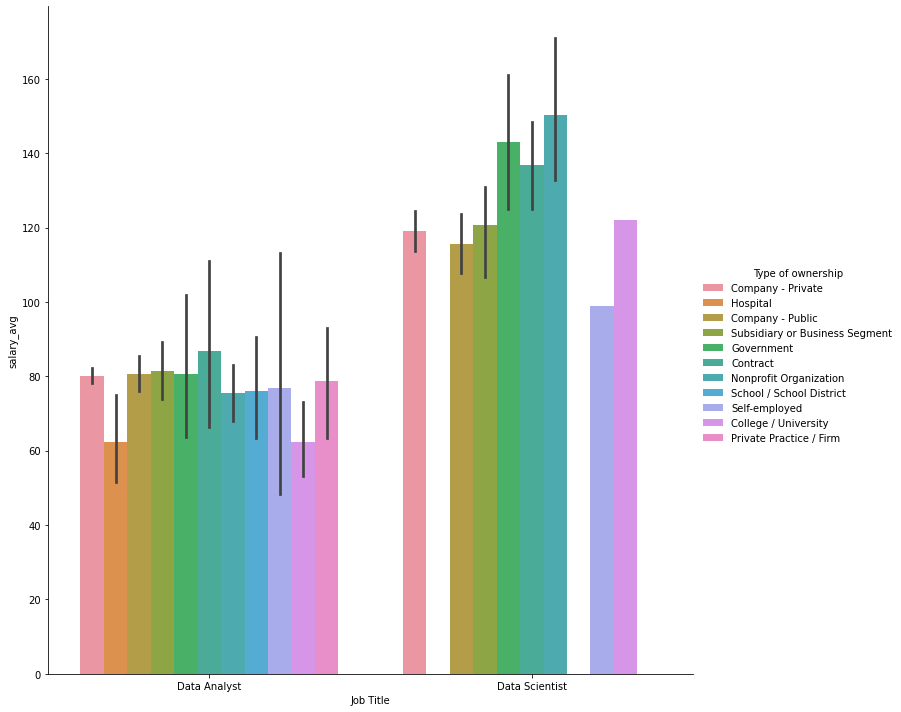

In [ ]:
#compare data scientist and data analyst salary average in public and private companies
sns.catplot(x="Job Title", y="salary_avg", hue="Type of ownership", kind="bar",height=10, data=df)

#### **Answer to Q1 :**
### As we see by plotting, the avrage salary of data scientest in private companies are very close to public ones but not equal.

### Q2) Do private companies have highest rate or public ones?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1cdda9e90>]],
      dtype=object)

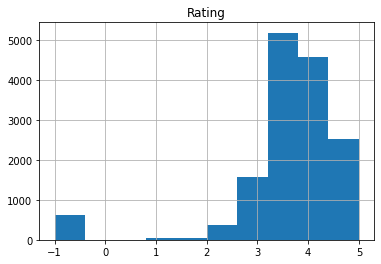

In [ ]:
#plot values of rating
data.hist(column='Rating')

In [ ]:
#display the values
data['Rating'].unique()

array([ 3.5,  4.5,  3.4,  2.9,  4.4,  5. ,  4.8,  3.9,  4.3,  3. ,  3.6,
        3.3,  4. ,  4.1,  3.8,  3.7,  4.2,  4.6, -1. ,  4.7,  3.2,  2.8,
        2.7,  4.9,  2.5,  1. ,  1.9,  3.1,  1.6,  2.6,  2.1,  2.3,  2.4,
        2. ,  2.2,  1.5,  1.7,  1.8,  1.4])

In [ ]:
# replace missing data(-1) with nan
data['Rating'].replace((-1), np.nan, inplace=True)
data['Rating'].replace(('-1'), np.nan, inplace=True)
data['Rating'].replace(('-1.0'), np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#check the ratio of missing data in type of rating
total_miss=data['Rating'].isnull().sum()
percent_miss = (total_miss/data['Rating'].isnull().count()*100) 
missing_data = {'Total missing':total_miss,'% missing':percent_miss}
missing_data

{'% missing': 4.117647058823529, 'Total missing': 616}

In [ ]:
# drop nulls
data = data.dropna()
data = data.reset_index()
data = data.drop(columns='index',axis=1)

In [ ]:
#check if -1 is removed or not
data['Rating'].unique()

array([3.5, 4.5, 3.4, 2.9, 4.4, 5. , 4.8, 3.9, 4.3, 3. , 3.6, 3.3, 4. ,
       4.1, 3.8, 3.7, 4.2, 4.6, 4.7, 3.2, 2.8, 2.7, 4.9, 2.5, 1. , 1.9,
       3.1, 1.6, 2.6, 2.1, 2.3, 2.4, 2. , 2.2, 1.5, 1.7, 1.8, 1.4])

In [ ]:
data['Type of ownership'].unique()

array(['Company - Private', 'Company - Public', 'Nonprofit Organization',
       'Government', 'Hospital', 'Self-employed',
       'Subsidiary or Business Segment', 'Contract',
       'Private Practice / Firm', 'College / University',
       'School / School District', 'Franchise'], dtype=object)

In [ ]:
public = data[data['Type of ownership']=='Company - Private']
private = data[data['Type of ownership']=='Company - Public']
df2 = pd.concat([public, private], axis=0)
df2

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary,salary_avg
0,Senior Data Scientist,$111K-$181K,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,111,181,146.0
1,"Data Scientist, Product Analytics",$111K-$181K,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,111,181,146.0
2,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,111,181,146.0
3,"Director, Data Science",$111K-$181K,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,111,181,146.0
4,Data Scientist,$111K-$181K,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1,111,181,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14331,Senior CAD/CAM Engineer,$76K-$128K,Description:The selected candidate will provid...,3.8,Lockheed Martin\n3.8,"Fort Worth, TX","Bethesda, MD",10000+ employees,1995,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD),"Boeing, Northrop Grumman, Raytheon Technologies",-1,76,128,102.0
14335,Future Opportunities: Software Development Eng...,$76K-$128K,Overview\n\nBeing thoughtful on the current si...,3.0,GM Financial\n3.0,"Arlington, TX","Fort Worth, TX",5001 to 10000 employees,1992,Company - Public,Lending,Finance,$5 to $10 billion (USD),-1,-1,76,128,102.0
14336,Systems Engineer-(Ft. Worth or Wichita),$76K-$128K,Systems Engineer II\n\nDescription\n\nThe Syst...,3.3,Textron\n3.3,"Fort Worth, TX","Providence, RI",10000+ employees,1923,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD),-1,-1,76,128,102.0
14338,Cloud Engineer,$76K-$128K,Req ID: 94114\n\nNTT DATA Services strives to ...,3.4,NTT DATA Services\n3.4,"Irving, TX","Tokyo, Japan",10000+ employees,1967,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Capgemini, Accenture, Deloitte",-1,76,128,102.0


In [ ]:
groupby_Sector = df2.groupby('Type of ownership')
for Sector, value in groupby_Sector['Rating']:
    print((Sector, value.mode(),value.mean()))

('Company - Private', 0    5.0
dtype: float64, 3.873069451189915)
('Company - Public', 0    3.7
dtype: float64, 3.6280112044818105)


#### Answer to Q2 :
### Private companies have alot of 5 rate but the mean of both is very close.

## Question 2
### Analyze the quality of data (all columns) and report statistics of missing data and outliers. 
### Briefly describe your step and findings.

### As we see at Rating column above, it contains outliers =-1, Salary Estimate feature has a lot of outliers we dropped them and Type of ownership too.

In [ ]:
#check duplicates
data.duplicated().sum()

21

In [ ]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#check nulls
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
Min_Salary           0
Max_Salary           0
salary_avg           0
dtype: int64

As we see, our data includes nulls but in different way. We will explore it now.

In [ ]:
#check missing data
data['Competitors'].value_counts()

-1                                        10015
Google, Microsoft, Samsung Electronics       98
Google, Microsoft, Walmart                   96
Amazon, Accenture, Microsoft                 93
Adecco, Manpower                             69
                                          ...  
Capita, G4S, Mitie                            1
Elsevier, Thomson Reuters, Google             1
NIKE, adidas                                  1
Allstate, Nationwide, State Farm              1
STS Aviation, Strom Aviation, Aerotek         1
Name: Competitors, Length: 1065, dtype: int64

#### As we see, the column of competitors contain huge number of missing values(-1), it is useless frature so we can drop it.
#### Sector is almost the same mean of Industry so we can drop it too.
#### I see Headquarter is useless too because we have Location that more accurate.

In [ ]:
# drop useless columns
data.drop(columns=['Min_Salary','Max_Salary','Salary Estimate','Headquarters','Sector','Competitors'], inplace=True)

In [ ]:
data

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,Easy Apply,salary_avg
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Unknown / Non-Applicable,-1,146.0
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Unknown / Non-Applicable,-1,146.0
2,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Unknown / Non-Applicable,-1,146.0
3,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,-1,146.0
4,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY",201 to 500 employees,1985,Company - Private,Insurance Carriers,Unknown / Non-Applicable,-1,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14339,Cloud Engineer,The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,$1 to $5 million (USD),-1,102.0
14340,Electrical Engineer,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),-1,102.0
14341,Sr. Big Data Engineer,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX",501 to 1000 employees,-1,Company - Private,IT Services,$100 to $500 million (USD),-1,102.0
14342,Senior Big Data / ETL Engineer,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX",Unknown,-1,Company - Public,-1,Unknown / Non-Applicable,-1,102.0


In [ ]:
data['Easy Apply'].value_counts()

-1      13729
TRUE      594
Name: Easy Apply, dtype: int64

We can replace -1 with false value

In [ ]:
data['Easy Apply'].replace(to_replace='-1',value='FALSE',inplace=True)

In [ ]:
data['Easy Apply'].value_counts()

FALSE    13729
TRUE       594
Name: Easy Apply, dtype: int64

In [ ]:
data['Revenue'].value_counts()

Unknown / Non-Applicable            3614
$10+ billion (USD)                  1976
$100 to $500 million (USD)          1588
$50 to $100 million (USD)           1283
$10 to $25 million (USD)             897
$2 to $5 billion (USD)               882
$25 to $50 million (USD)             762
$1 to $2 billion (USD)               707
$1 to $5 million (USD)               652
$5 to $10 billion (USD)              549
$500 million to $1 billion (USD)     516
$5 to $10 million (USD)              449
Less than $1 million (USD)           448
Name: Revenue, dtype: int64

In [ ]:
data['Industry'].unique()

array(['Travel Agencies', 'Health, Beauty, & Fitness', 'Internet',
       'Advertising & Marketing', 'Insurance Carriers',
       'Investment Banking & Asset Management',
       'Enterprise Software & Network Solutions', 'Other Retail Stores',
       'Consulting', 'Research & Development',
       'Motion Picture Production & Distribution', 'Brokerage Services',
       'IT Services', 'Computer Hardware & Software', 'Security Services',
       'Casual Restaurants', 'Food & Beverage Stores', 'Food Production',
       '-1', 'Health Fundraising Organizations',
       'Home Furniture & Housewares Stores',
       'Financial Analytics & Research', 'Education Training Services',
       'Lending', 'Social Assistance', 'Publishing', 'Federal Agencies',
       'Health Care Services & Hospitals',
       'Oil & Gas Exploration & Production', 'Staffing & Outsourcing',
       'Venture Capital & Private Equity',
       'Building & Personnel Services', 'Video Games', 'Accounting',
       'Consumer Produ

As we see, in feature of Industry we have -1 noisey data we should check the percentage of it to decide to drop it or not.

In [ ]:
#replace -1 with nan
data['Industry'].replace((-1), np.nan, inplace=True)
data['Industry'].replace(('-1'), np.nan, inplace=True)
data['Industry'].replace(('-1.0'), np.nan, inplace=True)

In [ ]:
#check the ratio of nan
total_miss=data['Industry'].isnull().sum()
percent_miss = (total_miss/data['Industry'].isnull().count()*100) 
missing_data = {'Total missing':total_miss,'% missing':percent_miss}
missing_data

{'% missing': 5.829784263073378, 'Total missing': 835}

Industry contains small percentage of nulls, so we can drop them.

In [ ]:
data=data.dropna()

In [ ]:
data['Founded'].value_counts()

-1       1950
 2008     603
 1999     439
 2002     399
 2000     362
         ... 
 1698       1
 1807       1
 1846       1
 1822       1
 1766       1
Name: Founded, Length: 217, dtype: int64

In [ ]:
data['Founded'].replace((-1), np.nan, inplace=True)
data['Founded'].replace(('-1'), np.nan, inplace=True)
data['Founded'].replace(('-1.0'), np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
total_miss=data['Founded'].isnull().sum()
percent_miss = (total_miss/data['Founded'].isnull().count()*100) 
missing_data = {'Total missing':total_miss,'% missing':percent_miss}
missing_data

{'% missing': 14.45729537366548, 'Total missing': 1950}

As we see here, we have 1953 noisey data so we can drop them.

In [ ]:
data=data.dropna()
data

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,Easy Apply,salary_avg
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Unknown / Non-Applicable,FALSE,146.0
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Unknown / Non-Applicable,FALSE,146.0
2,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Unknown / Non-Applicable,FALSE,146.0
3,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,FALSE,146.0
4,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY",201 to 500 employees,1985.0,Company - Private,Insurance Carriers,Unknown / Non-Applicable,FALSE,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14336,Systems Engineer-(Ft. Worth or Wichita),Systems Engineer II\n\nDescription\n\nThe Syst...,3.3,Textron\n3.3,"Fort Worth, TX",10000+ employees,1923.0,Company - Public,Aerospace & Defense,$10+ billion (USD),FALSE,102.0
14337,Electrical Engineer,"Electrical EngineerLocation: Fort Worth, TXDur...",3.6,"Iconma, L.L.C.\n3.6","Fort Worth, TX",1001 to 5000 employees,2000.0,Company - Private,Staffing & Outsourcing,$100 to $500 million (USD),FALSE,102.0
14338,Cloud Engineer,Req ID: 94114\n\nNTT DATA Services strives to ...,3.4,NTT DATA Services\n3.4,"Irving, TX",10000+ employees,1967.0,Company - Public,IT Services,$10+ billion (USD),FALSE,102.0
14340,Electrical Engineer,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),FALSE,102.0


In [ ]:
#make sure that the -1 has removed
data['Founded'].value_counts()

2008.0    603
1999.0    439
2002.0    399
2000.0    362
1998.0    341
         ... 
1822.0      1
1718.0      1
1831.0      1
1846.0      1
1766.0      1
Name: Founded, Length: 216, dtype: int64

In [ ]:
data.replace((-1), np.nan, inplace=True)
data.replace(('-1'), np.nan, inplace=True)
data.replace(('-1.0'), np.nan, inplace=True)

In [ ]:
total_miss=data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,% missing
Job Title,0,0.0
Job Description,0,0.0
Rating,0,0.0
Company Name,0,0.0
Location,0,0.0
Size,0,0.0
Founded,0,0.0
Type of ownership,0,0.0
Industry,0,0.0
Revenue,0,0.0


We need to check outliers

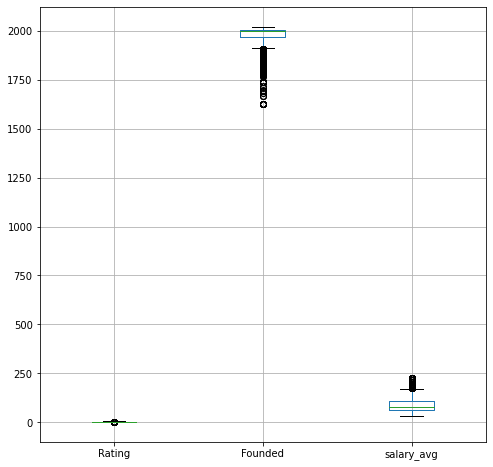

In [ ]:
data.boxplot(figsize=(8,8))

### As we see here the data contains outliers and -1 refers to the missing data.

## Question 3
### For the two questions you proposed in the first subquestion, what are the null hypothesis and alternative hypothesis? Perform statistical test to answer your question and report your findings.

### Q1) Are the salary of data scintest and data analyst larger in private company than public or not?

In [ ]:
#use analyst and scientist only to check mean of salary average
Analyst = data[data['Job Title']=='Data Analyst']
Scientist = data[data['Job Title']=='Data Scientist']

In [ ]:
public_analyst = Analyst[Analyst['Type of ownership']=='Company - Private']['salary_avg']
private_analyst = Analyst[Analyst['Type of ownership']=='Company - Public']['salary_avg']
ttest_ind(public_analyst, private_analyst)

Ttest_indResult(statistic=-0.4313639652264935, pvalue=0.6663234011319679)

In [ ]:
public_Scientist = Scientist[Scientist['Type of ownership']=='Company - Private']['salary_avg']
private_Scientist= Scientist[Scientist['Type of ownership']=='Company - Public']['salary_avg']
ttest_ind(public_Scientist, private_Scientist)

Ttest_indResult(statistic=-0.5677787336854081, pvalue=0.5710882063489588)

#### The first question is Null hypothesis.
The value of pvalue is larger than 0.05 and the two group means are equal.

### Q2) Do private companies have highest rate or public ones?

In [ ]:
groupby_Sector = data.groupby('Type of ownership')
for Sector, value in groupby_Sector['Rating']:
    print((Sector, value.mean()))

('College / University', 4.1191011235955095)
('Company - Private', 3.91064000000001)
('Company - Public', 3.6469163615883002)
('Contract', 3.66153846153846)
('Franchise', 4.0)
('Government', 3.4935622317596544)
('Hospital', 3.603370786516854)
('Nonprofit Organization', 3.5520761245674706)
('Private Practice / Firm', 3.9232558139534888)
('School / School District', 3.3947368421052633)
('Self-employed', 2.8)
('Subsidiary or Business Segment', 3.6296819787985877)


#### Second question is Alternative hypothesis.
Mean in private company not equal to public company.

## Display data

In [ ]:
data

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,Easy Apply,salary_avg
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Unknown / Non-Applicable,FALSE,146.0
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Unknown / Non-Applicable,FALSE,146.0
2,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Unknown / Non-Applicable,FALSE,146.0
3,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,FALSE,146.0
4,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY",201 to 500 employees,1985.0,Company - Private,Insurance Carriers,Unknown / Non-Applicable,FALSE,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14336,Systems Engineer-(Ft. Worth or Wichita),Systems Engineer II\n\nDescription\n\nThe Syst...,3.3,Textron\n3.3,"Fort Worth, TX",10000+ employees,1923.0,Company - Public,Aerospace & Defense,$10+ billion (USD),FALSE,102.0
14337,Electrical Engineer,"Electrical EngineerLocation: Fort Worth, TXDur...",3.6,"Iconma, L.L.C.\n3.6","Fort Worth, TX",1001 to 5000 employees,2000.0,Company - Private,Staffing & Outsourcing,$100 to $500 million (USD),FALSE,102.0
14338,Cloud Engineer,Req ID: 94114\n\nNTT DATA Services strives to ...,3.4,NTT DATA Services\n3.4,"Irving, TX",10000+ employees,1967.0,Company - Public,IT Services,$10+ billion (USD),FALSE,102.0
14340,Electrical Engineer,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),FALSE,102.0


## Question 4
### Briefly describe your feature engineering plan (at least two columns should be involved). No coding needed.

### The plan is:
### Some of feature engineering that I already did above:
*   Removed useless features.
*   Replace range of salary with average and convert it to numerical instead of categorical.
*   Replace -1 with nulls to see the percentage of missing data.
*   Drop some of nulls.
*   Drop duplicates.

### Upcoming feature engineering plan :
*   I think we need to filter company name feature from rating value.
*   We need to clean the job describtion feature and remove noisey char from it.
*   We need to replace job titles that close to each other with one title.
*   Divide 'Type of ownership' to private and public only.
*   Replace some of missing data with mode-mean-median.
